### Imports

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

### Open required data frames. PATH, FLIGHT DATA, ERROR AND FEATURES

In [37]:
#Select which path you wanna visualize.
path_num = 300

energy_df = pd.read_csv('../data_base/paths_energy/feat_pathv12_nuevo.csv', sep=",")
fd_df = pd.read_csv('../data_base/flight_data/fd_pathv12_salo.txt', sep="|",low_memory=False)
path_df = pd.read_csv('../data_base/random_paths/path_v12_salo.txt', sep="|")

#Select only data from desired path
current_fdPoint_info = fd_df.loc[(fd_df['route_num'] == path_num)]
current_path_info = path_df.loc[(path_df['path_num'] == path_num)]
current_features_info = energy_df.loc[(energy_df['path_num'] == path_num)]

print(current_path_info)

if current_features_info.empty:
    print('Features está vacio')
elif current_fdPoint_info.empty:
    print('Flight Data está vacio')
elif current_path_info.empty:
    print('Path está vacio')

     path_num                                            points  \
299       300  3,8,1;10,2,1;3,1,1;5,5,1;5,4,1;4,4,1;4,3,1;6,1,1   

                    times  
299  87,97,94,90,98,74,95  


### Graficas de posicion deseada vs posicion simulada.

intpointlist:  [[3, 8, 1], [10, 2, 1], [3, 1, 1], [5, 5, 1], [5, 4, 1], [4, 4, 1], [4, 3, 1], [6, 1, 1]]


/usr/lib/python3/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


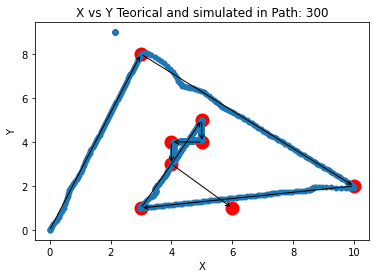

<AxesSubplot:xlabel='missing_points'>

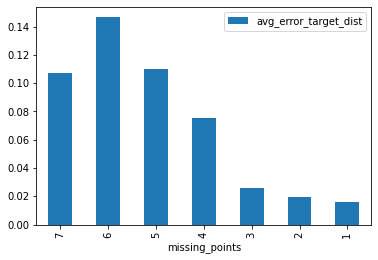

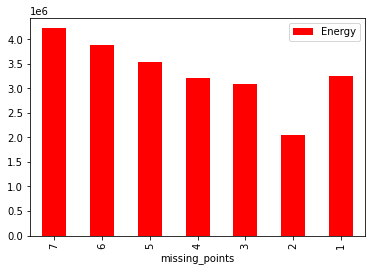

In [45]:
intPoints_list = []
prevX, prevY = 0,0 #For plotting arrows
#Extract points in path for graph
points_list = str(current_path_info['points'].iloc[0]).split(';')

for i in points_list:
    intPoints = list(map(int,i.split(','))) #convert time strings to int
    intPoints_list.append(intPoints)
        
#Graph extracted points
print('intpointlist: ', intPoints_list)
for loc in intPoints_list:
    plt.scatter(loc[0], loc[1], linewidths=8, color = 'red')
    plt.annotate(s='', xy=(loc[0],loc[1]), xytext=(prevX,prevY), arrowprops=dict(arrowstyle='->'))
    prevX, prevY = loc[0], loc[1]

plt.scatter(current_fdPoint_info['pos_x'], current_fdPoint_info['pos_y'],linewidths=0.01)
plt.title('X vs Y Teorical and simulated in Path: ' + str(path_num))
plt.xlabel('X')
plt.ylabel('Y')
#plt.xlim([-15, 15])
#plt.ylim([-15, 15])
plt.show()

#Error between drone and target (particle)
current_features_info.plot(x='missing_points', y = 'avg_error_target_dist', kind = 'bar')

#Plot energy used in each point.
current_features_info.plot(x='missing_points', y = 'Energy', kind = 'bar', color = 'red')


## Energies depending on different variables.

### Distance plots

<AxesSubplot:xlabel='Energy'>

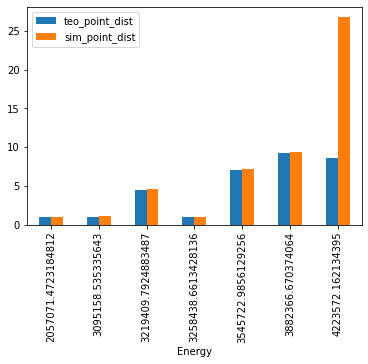

In [39]:
#Plot energy used depending of distance.
#sortedDF_dist = current_features_info.sort_values(by=['teo_point_dist'])
#sortedDF_dist.plot(x='teo_point_dist', y = 'Energy', kind = 'bar', color='blue')

sortedDF_dist = current_features_info.sort_values(by=['Energy'])
sortedDF_dist.plot(x='Energy', y = ['teo_point_dist','sim_point_dist'], kind = 'bar')


### Axis distance

<AxesSubplot:xlabel='Energy'>

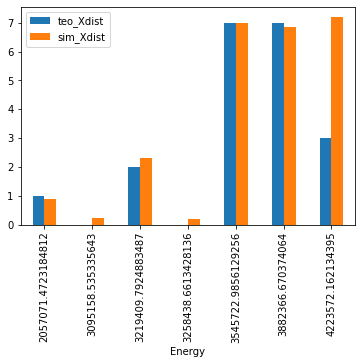

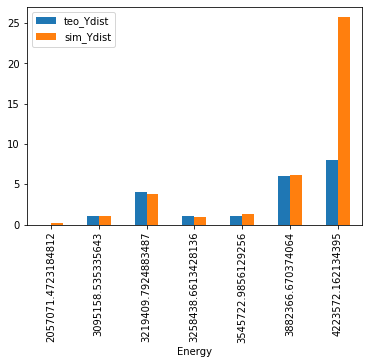

In [40]:
#Plot energy used depending of axis distance.
current_features_info['teo_Xdist'].abs()
#sortedDF_distX = current_features_info.sort_values(by=['teo_Xdist'])
#sortedDF_distX.plot(x='teo_Xdist', y = 'Energy', kind = 'bar')

sortedDF_distX = current_features_info.sort_values(by=['Energy'])
sortedDF_distX.plot(x='Energy', y = ['teo_Xdist','sim_Xdist'], kind = 'bar')

current_features_info['teo_Ydist'].abs()
#sortedDF_distX = current_features_info.sort_values(by=['teo_Ydist'])
#sortedDF_distX.plot(x='teo_Ydist', y = 'Energy', kind = 'bar', color = 'red')

sortedDF_distX = current_features_info.sort_values(by=['Energy'])
sortedDF_distX.plot(x='Energy', y = ['teo_Ydist','sim_Ydist'], kind = 'bar')

### Time plots

<AxesSubplot:xlabel='teo_point_time'>

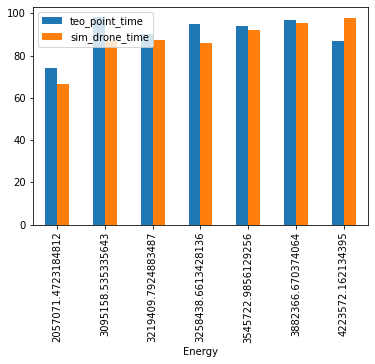

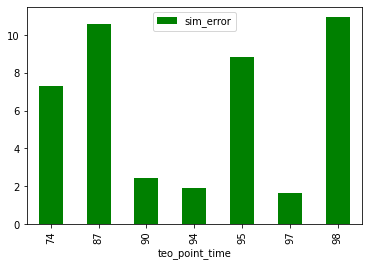

In [41]:
#Plot energy used depending of time.
sortedDF_times = current_features_info.sort_values(by=['Energy'])
sortedDF_times.plot(x='Energy', y = ['teo_point_time','sim_drone_time'], kind = 'bar')

#Compute and plot theorical vs simulated error
pd.options.mode.chained_assignment = None  # default='warn'
teo_sim_times_df = current_features_info[ ['teo_point_time','sim_drone_time'] ]
teo_sim_times_df['sim_error'] = teo_sim_times_df['teo_point_time'] - teo_sim_times_df['sim_drone_time'] 
teo_sim_times_df['sim_error'] = teo_sim_times_df['sim_error'].abs()
teo_sim_times_df = teo_sim_times_df.sort_values(by=['teo_point_time'])
teo_sim_times_df.plot(x='teo_point_time', y = 'sim_error', kind = 'bar', color='green')

### Teorical velocity.

<AxesSubplot:xlabel='teo_point_vel'>

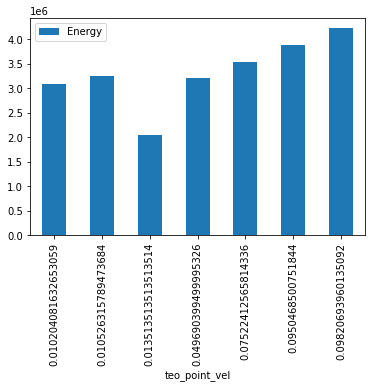

In [42]:
sortedDF_time = current_features_info.sort_values(by=['teo_point_vel'])
sortedDF_time.plot(x='teo_point_vel', y = 'Energy', kind = 'bar')